<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumToyAlgorithm_QPE_01_ChatGPT_mkbahk_20250424.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 642.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 542.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 554.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 765.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 658.8 kB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=70f42689ab0200eaac0895938b9ac524fb6c40e50809f7b5641d814c9e793ddf
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.4 MB/s eta 0:00:00
  Cloning https://github.com

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

In [22]:
from qiskit.circuit.library import QFT

In [29]:
# 설정
theta = 0.125  # 우리가 추정하려는 위상
n_count = 3    # 위상 레지스터의 큐비트 수 (정밀도 조절용)

# 위상 추정 회로 생성
qc = QuantumCircuit(n_count + 1, n_count)

# Step 1: Hadamard gate to counting qubits
for q in range(n_count):
    qc.h(q)
###for
qc.barrier()

# Step 2: 준비 상태 (고유벡터 |1⟩) 준비
qc.x(n_count)  # 마지막 큐비트를 |1⟩로 초기화
qc.barrier()

# Step 3: Controlled-U^{2^j} 연산 적용
for q in range(n_count):
    repetitions = 2 ** q
    angle = 2 * np.pi * theta * repetitions
    qc.cp(angle, q, n_count)  # Controlled-Phase

# Step 4: 역 QFT 적용
qc.append(QFT(num_qubits=n_count, inverse=True, do_swaps=True).to_gate(), range(n_count))

qc.barrier()
# Step 5: 측정
qc.measure(range(n_count), range(n_count))


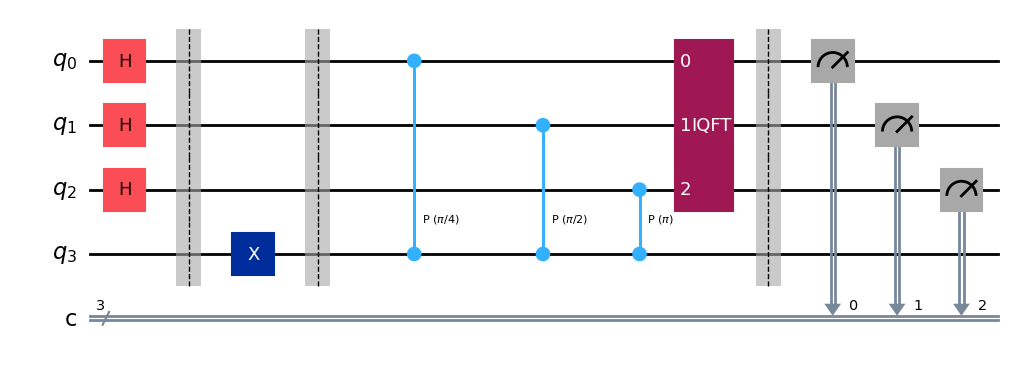

In [30]:
qc.draw("mpl")

In [25]:
# 시뮬레이터 설정 및 실행
simulator = Aer.get_backend('qasm_simulator')

tqc = transpile(qc, simulator)
#qobj = assemble(tqc)

result = simulator.run(tqc, shots=1024).result()
counts = result.get_counts()

# 결과 출력
print(counts)

{'001': 1024}


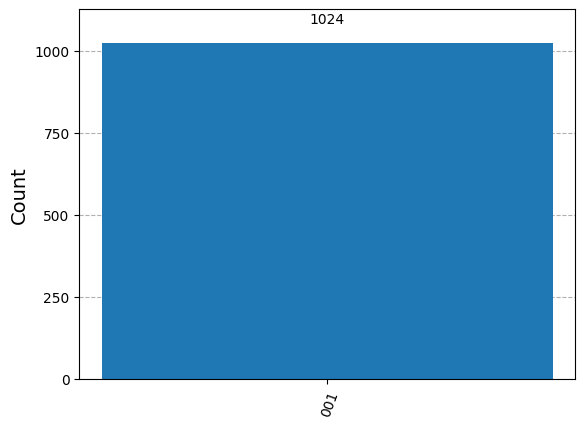

In [26]:
plot_histogram(counts)

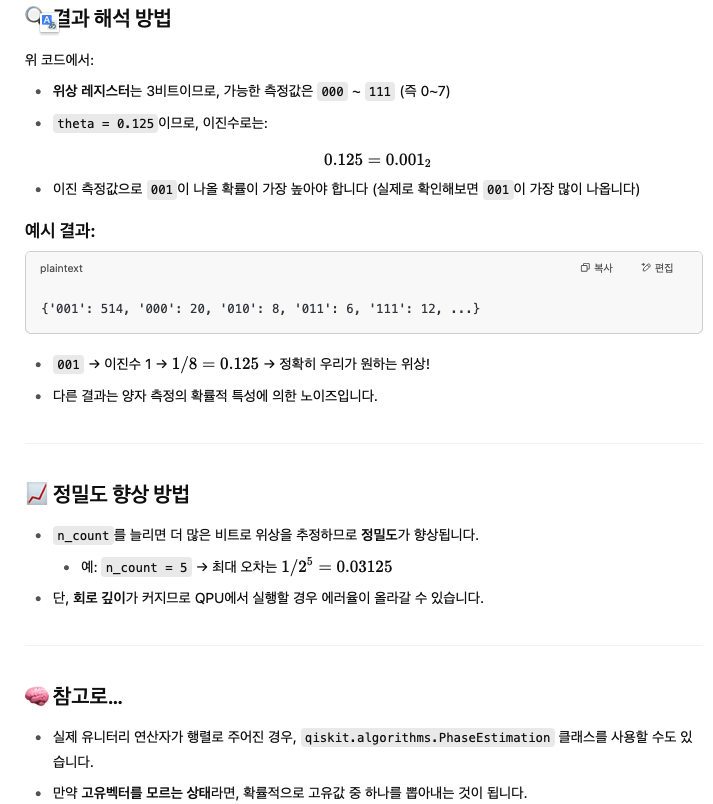